# Trabalho #5 - Classificação de Múltiplas Classes

Nesse trabalho você vai desenvolver uma rede neural tipo densa usando a plataforma TensorFlow-Keras para realizar uma tarefa de classificação de múltiplas classes.

A tarefa de classificação desse trabalho consiste na identificação de tipos de vestuários a partir de imagens.

## Coloque aqui o seu nome

Nome: Anderson Alves Schinaid


Em primeiro lugar é necessário importar alguns pacotes do Python que serão usados nesse trabalho:
- Numpy pacote de cálculo científico com Python
- Matplotlib biblioteca para gerar gráficos em Python
- TensorFlow

In [6]:
!pip install optuna

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import optuna

# Importa classe de utilidades do Keras
from tensorflow.keras.utils import to_categorical

%matplotlib inline

## 1 - Visão geral do problema ##

O objetivo desse problema é determinar o tipo de vestuário que é mostrado em uma imagem usando uma RNA. Assim, esse problema consiste em dada uma imagem, a RNA avalia a probabilidade de existirem determinados tipos de vestuário na imagem e determina qual o tipo mais provável entre dez possíveis.

O banco de dados usado nesse exemplo é o Fashion-MNIST, que consiste de imagens de artigos de vestuário da Zalando. Esse banco de dados pode ser obtido no link https://github.com/zalandoresearch/fashion-mnist.

Algumas dessas imagens estão mostradas na figura abaixo.

<img src="Fashion_MNIST.png">


## 2 - Dados de treinamento

Características dos dados:

- O banco de dados Fashion MNIST possui 60.000 exemplos de treinamento e 10.000 exemplos de teste;
- Cada exemplo consiste de uma imagem em tons de cinza, de dimensão 28x28 pixels;
- Cada imagem é associada a um rótulo de 10 classes;
- O valor da intensidade luminosa de cada pixel da imagem é um número inteiro entre 0 e 255.

As possíveis classes (rótulos) presentes nas imagens são as seguintes:

    0 – camiseta;
    1 – calça;
    2 – pulôver;
    3 – vestido;
    4 – casaco;
    5 – sandália;
    6 – camisa;
    7 – tênis.
    8 – bolsa;
    9 – bota de cano curto.


### 2.1 - Leitura dos dados

O Keras já possui esse banco de dados e para usá-lo basta importá-lo com um comando. Assim, execute o código da célula abaixo para carregar os dados.

Observe que usando 60.000 exemplos demora muito para treinar aRNA, então, nesse trabalho usaremos somente 10.000 exemplos de treinamento, 2.000 exemplos de validação e 2.000 exemplos de teste. E todos esses exemplos serão extraídos do conjunto de treinamento.

In [2]:
# Importa bancos de dados do Keras
from tensorflow.keras.datasets import fashion_mnist

# Carrega dados da Fashion-MNIST em tenores
(X_train_orig, Y_train_orig), (xx, yy) = fashion_mnist.load_data()

classes = ['camiseta','calça','pulover','vestido','casaco','sandália','camisa','tênis','bolsa','bota']

print("X_train shape:", X_train_orig.shape, "y_train shape:", Y_train_orig.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X_train shape: (60000, 28, 28) y_train shape: (60000,)


Note que no código acima, `xx` e `yy` são as variáveis de entrada e de saída do conjunto de exemplos de teste original, que nesse trabalho não serão usados.

Pela dimensão dos tensores dos dados de treinamento temos 60.000 imagens de treinamento com dimensão de 28 por 28 pixels.

Execute a célula a seguir para visualizar um exemplo de uma imagem do banco de dados com a sua classe. Altere o valor da variável `index` e execute a célula novamente para visualizar mais exemplos diferentes.

y = 8


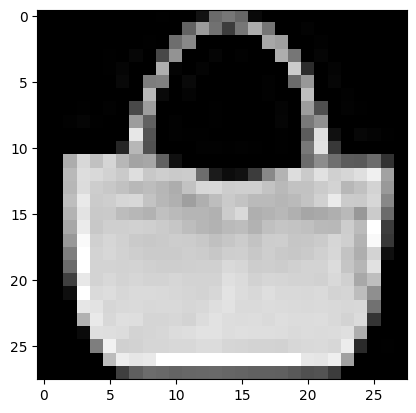

In [3]:
# Exemplo de uma imagem
index = 100
plt.imshow(X_train_orig[index], cmap='gray')
print ("y = " + str(np.squeeze(Y_train_orig[index])))

### 2.2 - Processamento dos dados

Para os dados poderem ser usados por uma RNA devemos primeiramente processá-los.

Para isso devemos realizar as seguintes etapas:

- Dividir aleatóriamente os dados nos conjuntos de treinamento, validação e teste;
- Os valores dos pixels nas imagens é um número inteiro que deve ser transformados em números reais para serem usados nos cálculos;
- Redimensionar as imagens para transformá-las em um vetor linha;
- Normalizar as imagens de forma que os valores dos pixels fiquem entre 0 e 1.

### Exercício #1: Conjuntos de treinamento e validação

Na célula abaixo crie um código para para dividir o conjunto de treinamento nos conjuntos de treinamento, validação e teste. Use 10.000 exemplos para o conjunto de treinamento e 2.000 exemplos para cada um dos conjunto de validação e teste. Não se esqueça de separar também as classes.

Para selecionar os exemplos de cada um dos conjuntos, utilize o vetor de índices `ind`, que consiste de números inteiros de 0 a 59.999, ordenados de forma aleatória. Dessa forma, pegue os primeiros 10.000 elementos em `ind` para os exemplos de treinamento, os elementos de 10.000 a 12.000 para os exemplos de validação e os elementos de 12.000 a 14.000 vara os exemplos de teste.

In [4]:
# PARA VOCÊ FAZER: Divisão dos dados de treinamento em dados de treinamento e validação

# Gera vetor de indíces (números inteiros) de 0 a 59.999 com ordenamento aletório
ind = np.random.randint(60000, size=60000)

# Dados de entrada
### COMECE AQUI ### (≈ 3 linhas)
X_train = X_train_orig[ind[:10000]]
X_val = X_train_orig[ind[10000:12000]]
X_test = X_train_orig[ind[12000:14000]]
### TERMINE AQUI ###

# Dados de saída
### COMECE AQUI ### (≈ 3 linhas)
Y_train = Y_train_orig[ind[:10000]]
Y_val = Y_train_orig[ind[10000:12000]]
Y_test = Y_train_orig[ind[12000:14000]]
### TERMINE AQUI ###

# Acerta dimensões dos vetores de saída
Y_train = Y_train.reshape((Y_train.shape[0], 1))
Y_val = Y_val.reshape((Y_val.shape[0], 1))
Y_test = Y_test.reshape((Y_test.shape[0], 1))

print("Dimensão do tensor de dados de entrada de treinamento =", X_train.shape)
print("Dimensão do tensor de dados de entrada de validação =", X_val.shape)
print("Dimensão do tensor de dados de saída de treinamento =", Y_train.shape)
print("Dimensão do tensor de dados de saída de validação =", Y_val.shape)
print("Dimensão do tensor de dados de saída de test =", Y_test.shape)

Dimensão do tensor de dados de entrada de treinamento = (10000, 28, 28)
Dimensão do tensor de dados de entrada de validação = (2000, 28, 28)
Dimensão do tensor de dados de saída de treinamento = (10000, 1)
Dimensão do tensor de dados de saída de validação = (2000, 1)
Dimensão do tensor de dados de saída de test = (2000, 1)


**Saída esperada:**

    Dimensão do tensor de dados de entrada de treinamento = (10000, 28, 28)
    Dimensão do tensor de dados de entrada de validação = (2000, 28, 28)
    Dimensão do tensor de dados de saída de treinamento = (10000, 1)
    Dimensão do tensor de dados de saída de validação = (2000, 1)
    Dimensão do tensor de dados de saída de test = (2000, 1)

### Exercício #2: Normalização e redimensionameto dos dados de entrada

Na célula abaixo crie um código para normalizar e transformar as imagens em números reais, dividindo por 255. Após essa operação, deve-se redimensionar os dados de entrada para ficarem na forma de vetor linha de dimensão `num_px * num_px`.

In [7]:
# PARA VOCÊ FAZER: Normalização dos dados de entrada

# Guarda dimensão das imagens
num_px = X_train.shape[1]
print("Numero de colunas e linhas das imagens de entrada=", num_px)

# Transformação dos dados em números reais
X_train_float = X_train.astype('float32') / 255.0
X_val_float = X_val.astype('float32') / 255.0
X_test_float = X_test.astype('float32') / 255.0
### TERMINE AQUI ###

# Redimensionamento dos dados de entrada
m_train = X_train_float.shape[0]  # Número de exemplos de treinamento
X_train_flat = X_train_float.reshape(m_train, num_px * num_px)

m_val = X_val_float.shape[0]  # Número de exemplos de validação
X_val_flat = X_val_float.reshape(m_val, num_px * num_px)

m_test = X_test_float.shape[0]  # Número de exemplos de teste
X_test_flat = X_test_float.reshape(m_test, num_px * num_px)
### TERMINE AQUI ###

# Dimensão dos tensores de dados
print('Dimensão dos dados de entrada do conjunto de treinamento: ', X_train_flat.shape)
print('Dimensão dos dados de entrada do conjunto de validação: ', X_test_flat.shape)
print('Dimensão dos dados de entrada do conjunto de teste: ', X_test_flat.shape)

# Para verificar se os resultados estão corretos
print("Alguns elementos da primeira imagem de treinamento = ", X_train_flat[14,10:15])
print("Alguns elementos da primeira imagem de validação = ", X_val_flat[14,10:15])
print("Alguns elementos da primeira imagem de teste = ", X_test_flat[14,10:15])

Numero de colunas e linhas das imagens de entrada= 28
Dimensão dos dados de entrada do conjunto de treinamento:  (10000, 784)
Dimensão dos dados de entrada do conjunto de validação:  (2000, 784)
Dimensão dos dados de entrada do conjunto de teste:  (2000, 784)
Alguns elementos da primeira imagem de treinamento =  [0.10980392 0.10588235 0.0627451  0.09019608 0.14509805]
Alguns elementos da primeira imagem de validação =  [0.4745098  0.63529414 0.24313726 0.29411766 0.8862745 ]
Alguns elementos da primeira imagem de teste =  [0.         0.         0.01568628 0.00784314 0.        ]


**Saída esperada:**

    Numero de colunas e linhas das imagens de entrada= 28
    Dimensão dos dados de entrada do conjunto de treinamento:  (10000, 784)
    Dimensão dos dados de entrada do conjunto de validação:  (2000, 784)
    Dimensão dos dados de entrada do conjunto de teste:  (2000, 784)
    Alguns elementos da primeira imagem de treinamento =  [0.13333334 0.         0.         0.         0.        ]
    Alguns elementos da primeira imagem de validação =  [0.         0.         0.827451   0.8980392  0.85490197]
    Alguns elementos da primeira imagem de teste =  [0.04705882 0.34117648 0.05098039 0.         0.00784314]


### Exercício #3: Codificação das classes

As classes das imagens são identificadas por um número inteiro que varia de 0 a 9. Porém, a saída esperada de uma RNA para um problema de classificação de múltiplas classes é um vetor de dimensão igual ao número de classes, que no caso são 9 classes. Cada elemento desse vetor representa a probabilidade da imagem ser uma classe. Assim, devemos transformar as saídas reais do conjunto de dados em um vetor linha de 9 elementos, com todos os elementos iguais a zero a menos do correspondente ao da classe da imagem, que deve ser igual a um.

A função que realiza essa transformação é conhecida na literatura de "one-hot-encoding”, que no Keras é chamada de `to_categorical`. Essa função pertence à classe de utilidades do Keras que deve ser importada antes de ser utilizada.

Implemente na célula abaixo a transformação dos dados de saída usando a função `to_categorical` do keras.

In [8]:
# PARA VOCÊ FAZER: Coficação das classes dos exemplos


# Transformação das classes de números reais para vetores
Y_train_hot = to_categorical(Y_train, num_classes=10)
Y_val_hot = to_categorical(Y_val, num_classes=10)
Y_test_hot = to_categorical(Y_test, num_classes=10)
### Termine AQUI ###

# Dimensão dos dados
print('Dimensão dos dados de saída do conjunto de treinamento: ', Y_train_hot.shape)
print('Dimensão dos dados de saída do conjunto de validação: ', Y_val_hot.shape)
print('Dimensão dos dados de saída do conjunto de teste: ', Y_test_hot.shape)

# Para verificar se os resultados estão corretos
print(' ')
print("Primeiras 5 classes numéricas dos exemplos de treinamento = ", Y_train[:5].T)
print("Primeiras 5 saídas dos exemplos de treinamento = ", Y_train_hot[:5,:])
print(' ')
print("Primeiras 5 classes numéricas dos exemplos de validação = ", Y_val[:5].T)
print("Primeiras 5 saídas dos exemplos de validação = ", Y_val_hot[:5,:])
print(' ')
print("Primeiras 5 classes numéricas dos exemplos de teste = ", Y_test[:5].T)
print("Primeiras 5 saídas dos exemplos de teste = ", Y_test_hot[:5,:])

Dimensão dos dados de saída do conjunto de treinamento:  (10000, 10)
Dimensão dos dados de saída do conjunto de validação:  (2000, 10)
Dimensão dos dados de saída do conjunto de teste:  (2000, 10)
 
Primeiras 5 classes numéricas dos exemplos de treinamento =  [[2 5 7 3 7]]
Primeiras 5 saídas dos exemplos de treinamento =  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
 
Primeiras 5 classes numéricas dos exemplos de validação =  [[9 0 1 6 5]]
Primeiras 5 saídas dos exemplos de validação =  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
 
Primeiras 5 classes numéricas dos exemplos de teste =  [[1 0 5 0 6]]
Primeiras 5 saídas dos exemplos de teste =  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0.

**Saída esperada:**

    Dimensão dos dados de saída do conjunto de treinamento:  (10000, 10)
    Dimensão dos dados de saída do conjunto de validação:  (2000, 10)
    Dimensão dos dados de saída do conjunto de teste:  (2000, 10)
     
    Primeiras 5 classes numéricas dos exemplos de treinamento =  [[1 6 7 5 8]]
    Primeiras 5 saídas dos exemplos de treinamento =  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
     [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
     
    Primeiras 5 classes numéricas dos exemplos de validação =  [[8 7 7 5 9]]
    Primeiras 5 saídas dos exemplos de validação =  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
     [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
     
    Primeiras 5 classes numéricas dos exemplos de teste =  [[1 7 2 0 2]]
    Primeiras 5 saídas dos exemplos de teste =  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
     [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
     [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
        
**Visualização da entrada e saída correspondente**

Execute a célula abaixo para verificar se o seu programa está realizando de fato o que você espera. No código abaixo `index` é o número sequencial da imagem. Tente trocar a imagem, mudando a variável `index`, usando valores entre 0 e 59.999, para visualizar outros exemplos.

Classe numérica:  [8] , Vetor de saída correspondentes:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


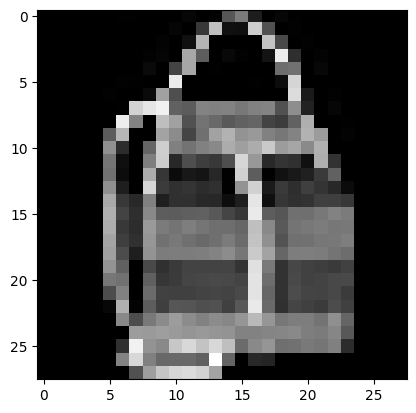

In [9]:
# Exemplo de saída
index = 20
print("Classe numérica: ", Y_train[index], ", Vetor de saída correspondentes: ", Y_train_hot[index])
plt.imshow(X_train[index], cmap='gray', vmin=0, vmax=255)

**Saída esperada:**

    Classe numérica:  [2] , Vetor de saída correspondentes:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

## 3 - Criação e treinamento da RNA

Nesse trabalho você irá usar uma RNA com camadas do tipo densa.

### Exercício #4: Criação e configuração da RNA

Você vai usar uma RNA com 2 camadas intermediárias e uma camada de saída com as seguintes características:

- Primeira camada: número de neurônios `n1`, função de ativação ReLu;
- Segunda camada: número de neurônios `n2`, função de ativação ReLu;
- Camada de saída: número de neurônio `n3`, função de ativação softmax;
- Regularização L2 na primeira e segunda camadas.

Na célula abaixo crie uma função que recebe a dimensão dos dados de entrada, os números de neurônios das 3 camadas e o parâmetro de regularização e configura a RNA de acordo com as características acima.

In [11]:
# PARA VOCÊ FAZER: Função para configuração da RNA

# Importa classes do Keras de modelos e camadas
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

def build_model(data_shape, lamb, n1, n2, n3):
    """
    Essa função configura uma rede neural deep-learnig

    Argumentos:
    data_shape = tupla com dimensões dos dados de entrada da rede
    lamb = parãmetro de regularização L2
    n1 = número de neurônios da primeira camada
    n2 = número de neurônios da segunda camada
    n3 = número de neurônios da camada de saída

    Retorna: modelo da rede neural
    """

    # Instanciação do modelo
    model = models.Sequential()

    # Adicione as camadas em seu modelo de RNA
    model.add(layers.Dense(n1, activation='relu', kernel_regularizer=regularizers.l2(lamb), input_shape=data_shape))
    model.add(layers.Dense(n2, activation='relu', kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.Dense(n3, activation='softmax'))
    ### TERMINE AQUI ###

    return model

Defina os números de neurônios das camadas intermediárias e de saída e crie a RNA usando a função `build_model` criada na célula anterior. Utilize `n1 = 64`, `n2 = 32`, `n3 = 10` e `lamb = 0.0002`. Após criar a RNA utilize o método `summary` para visualizar a sua rede.

In [12]:
# PARA VOCÊ FAZER: criação da RNA

# Dimensão dos dados de entrada
#### COMECE AQUI ### (≈ 1 linhas)
data_shape = (28*28,)
### TERMINE AQUI ###

# Definição dos números de neurônios das camadas e parâmetro de regularização
#### COMECE AQUI ### (≈ 4 linhas)
n1 = 64  # Neurônios da primeira camada
n2 = 32  # Neurônios da segunda camada
n3 = 10  # Neurônios da camada de saída (corresponde às 10 classes)
lamb = 0.0002  # Parâmetro de regularização L2
### TERMINE AQUI ###

# Cria rede neural deep learning e apresenta sua configuração
#### COMECE AQUI ### (≈ 2 linhas)
rna = build_model(data_shape, lamb, n1, n2, n3)
rna.summary()
### TERMINE AQUI ###


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

**Saída esperada:**

    Model: "sequential_1"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    dense (Dense)                (None, 64)                50240     
    _________________________________________________________________
    dense_1 (Dense)              (None, 32)                2080      
    _________________________________________________________________
    dense_2 (Dense)              (None, 10)                330       
    =================================================================
    Total params: 52,650
    Trainable params: 52,650
    Non-trainable params: 0
    _________________________________________________________________

### Exercício #5: Compilação e treinamento da RNA

Agora você vai treinar a sua RNA usando o método de otimização Adam. Assim, na célula abaixo, compile e treine a sua RNA usando os seguinte hiperparâmetros:

- taxa de aprendizado = 0,01;
- Tamanho do lote = 256;
- número de épocas = 100.

**Importante:** Escolha o parâmetro `verbose=0` no método `fit` para evitar de imprimir os resultados das 100 épocas de treinamento.

In [13]:
# PARA VOCÊ FAZER: compilação e treinamento da RNA usando o método do gradiente descendente com momento

# importa do keras a classe dos otimizadores
from tensorflow.keras import optimizers

# Configuração do otimizador
### COMECE AQUI ### (≈ 2 linhas)
adam = optimizers.Adam(learning_rate=0.01 )
rna.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
### TERMINE AQUI ###

# Treinamento da RNA
### COMECE AQUI ### (≈ 1 linha)
history = rna.fit(X_train_flat, Y_train_hot, epochs=100, batch_size=256, validation_data=(X_val_flat, Y_val_hot), verbose=0)
### TERMINE AQUI ###

### Visualização dos resultados

Execute a célula a seguir para fazer os gráficos da função de custo e da métrica para os dados de treinamento e validação.

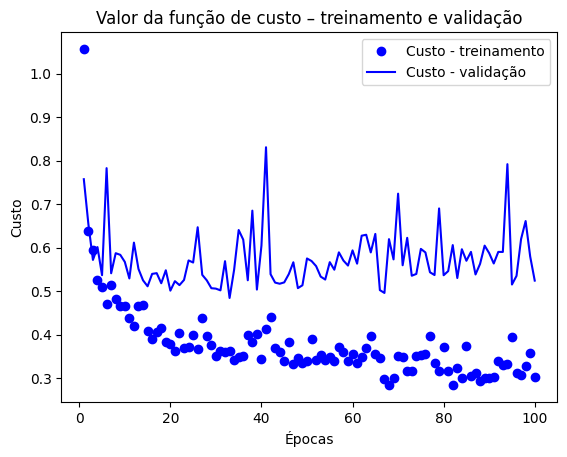

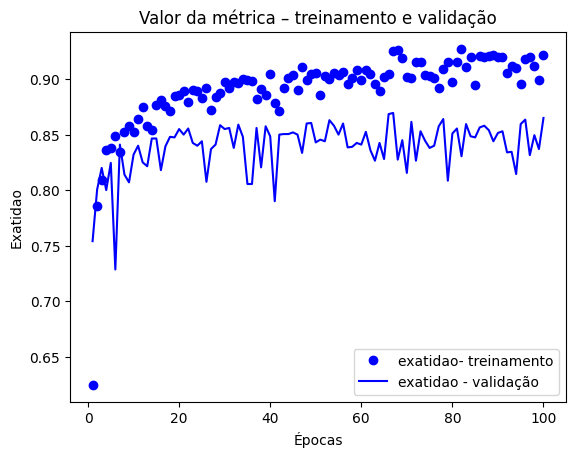

In [14]:
# Salva treinamento na variável history para visualização
history_dict = history.history

# Salva custos, métricas e epocas em vetores
custo = history_dict['loss']
acc = history_dict['accuracy']
val_custo = history_dict['val_loss']
val_acc = history_dict['val_accuracy']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Gráfico dos valores de custo
plt.plot(epocas, custo, 'bo', label='Custo - treinamento')
plt.plot(epocas, val_custo, 'b', label='Custo - validação')
plt.title('Valor da função de custo – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocas, acc, 'bo', label='exatidao- treinamento')
plt.plot(epocas, val_acc, 'b', label='exatidao - validação')
plt.title('Valor da métrica – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Exatidao')
plt.legend()
plt.show()

### Análise dos resultados

Pelos gráficos da função de custo e da métrica você deve observar o seguinte:

- O valor do custo para os dados de treinamento diminui constantemente ao longo do treinamento e estabiliza em um valor de cerca de 0,4.
- O valor do custo para os dados de validação diminui até por volta da época 20 e depois estabiliza em um valor de cerca de 0,6, o que representa um resultado não muito bom.
- A exatidão obtida para os dados de treinamento é de 90%, enquanto que para os dados de validação é de cerca de 85%.

O grafico da função de custo durante o treinamento e os valores obtidos para a função de custo e para a métrica no final do treinamento mostram claramente que está ocorrendo um pouco de overfitting dos dados de treinamento.

### Exercício #6: Cálculo do custo e métrica

Modifique a célula abaixo para calcular o custo e a exatidão para os dados de treinamento, validação e teste.

In [15]:
# PARA VOCÊ FAZER: calculo do custo e a exatidão para os dados de treinamento, validação e teste

# Usando o método evaluate calcule o custo e a exatidão
### COMECE AQUI ### (≈ 3 linhas)
custo_e_metricas_train = rna.evaluate(X_train_flat, Y_train_hot, verbose=0)
custo_e_metricas_val = rna.evaluate(X_val_flat, Y_val_hot, verbose=0)
custo_e_metricas_test = rna.evaluate(X_test_flat, Y_test_hot, verbose=0)
### TERMINE AQUI ###

print('Dados de treinamento: ', custo_e_metricas_train)
print('Dados de validação: ', custo_e_metricas_val)
print('Dados de teste: ', custo_e_metricas_test)

Dados de treinamento:  [0.271241694688797, 0.9325000047683716]
Dados de validação:  [0.524172306060791, 0.8650000095367432]
Dados de teste:  [0.5482102036476135, 0.8690000176429749]


**Exemplo de saída esperada:**

    313/313 [==============================] - 1s 2ms/step - loss: 0.4662 - accuracy: 0.8686
    63/63 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.8260
    63/63 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.8285
    Dados de treinamento:  [0.46621835231781006, 0.8686000108718872]
    Dados de validação:  [0.6347703337669373, 0.8259999752044678]
    Dados de teste:  [0.659702718257904, 0.828499972820282]

## 4 - Teste da RNA

### Exercício #7: Verificação dos resultados

Na célula abaixo calcule a previsões da sua RNA para as imagens dos dados de teste e depois verifique se algumas dessas previsões estão corretas.

Note que a previsão da RNA é um vetor de 9 elementos com as probabilidades da imagem mostrar os 10 tipos de vestuários. Para detereminar a classe prevista deve-se transformar esse vetor em um número inteiro de 0 a 9, que representa o vestuário sendo mostrado. Para fazer essa transformação use a função numpy `argmax(Y_prev, axis=?)`, onde `Y_prev` é o tensor com as saídas previstas pela RNA. Em qual eixo você deve calcular o índice da maior probabilidade?

Previsto como bolsa


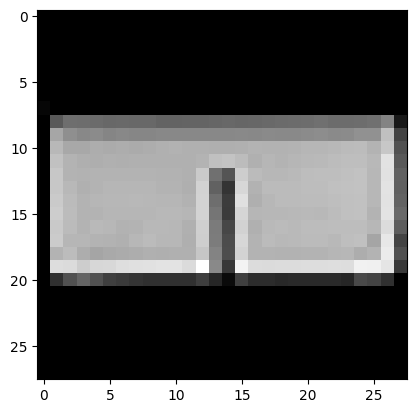

In [16]:
# PARA VOCÊ FAZER: cálculo das classes previstas pela RNA no conjunto de testes

# Calculo das previsões da RNA
### COMECE AQUI ### (≈ 1 linha)
Y_prev = rna.predict(X_test_flat, verbose=0)
### TERMINE AQUI ###

# Cálculo das classes previstas
### COMECE AQUI ### (≈ 1 linha)
classe = np.argmax(Y_prev, axis=1)
### TERMINE AQUI ###

# Exemplo de uma imagem dos dados de teste
index = 20
plt.imshow(X_test[index], cmap='gray')
print (f"Previsto como {classes[classe[index]]}")

### Exercício #8: Visualização dos resultados

Na célula abaixo crie um código para fazer um gráfico com as classes reais e as previstas pela sua RNA para todos os 150 primeiros exemplos do connjunto de teste.

Dimensão vetor classes reais=  (2000, 1)
Dimensão vetor classes previstas=  (2000,)


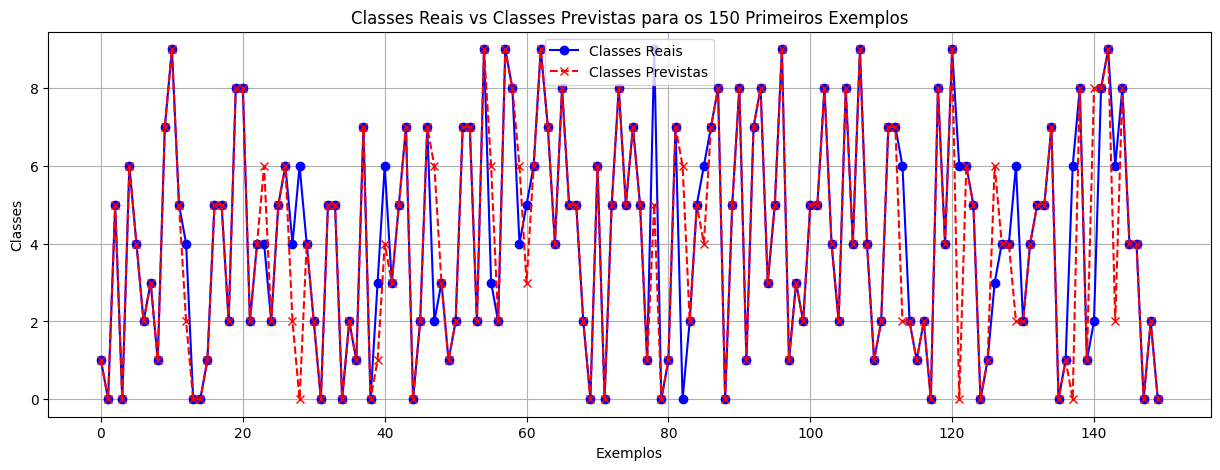

In [17]:
# PARA VOCÊ FAZER: cálculo das classes previstas pela RNA

# Resultado gráfico
# Verifique dimensoes dos vetores de classes reais e previstas
print('Dimensão vetor classes reais= ', Y_test.shape)
print('Dimensão vetor classes previstas= ', classe.shape)

# Fazer o gráfico das classes reais e previstas
plt.figure(figsize=(15, 5))
### COMECE AQUI ### (≈ 7 linhas)
# Plotar classes reais
plt.plot(Y_test[:150], label='Classes Reais', marker='o', linestyle='-', color='b')

# Plotar classes previstas
plt.plot(classe[:150], label='Classes Previstas', marker='x', linestyle='--', color='r')

# Configuração do gráfico
plt.title('Classes Reais vs Classes Previstas para os 150 Primeiros Exemplos')
plt.xlabel('Exemplos')
plt.ylabel('Classes')
plt.legend()
plt.grid(True)
plt.show()
### TERMINE AQUI ###


**Saída esperada:**

    Dimensão vetor classes reais=  (2000, 1)
    Dimensão vetor classes previstas=  (2000,)

<img src="classes_reais_previstas.png">

Note que cada bolinha azul mostrada no gráfico representa um erro de classificação.

### Ponto extra

**Será que é possível melhorar os resultados?**

Faça uma cópia deste notebook com as alterações que desejar para melhorar a rede. Altere, por exemplo: número de camadas e de neurônios, funções de ativação, método de otimização, método de regularização...

Testarei a rede treinada em um outro conjunto de dados. O melhor resultado da sala ganha uma caixa de chocolate na última aula.

In [18]:
# Função de objetivo para o Optuna
def objective(trial):
    # Otimizador
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"])
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)

    if optimizer_name == "Adam":
        optimizer = optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == "SGD":
        optimizer = optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_name == "RMSprop":
        optimizer = optimizers.RMSprop(learning_rate=learning_rate)

    # Número de épocas
    epochs = trial.suggest_int("epochs", 10, 100)

    # Criação do modelo
    model = build_model(data_shape, lamb, n1, n2, n3)

    # Compilação do modelo
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Treinamento do modelo
    history = model.fit(
        X_train_flat, Y_train_hot,
        epochs=epochs,
        batch_size=256,
        validation_data=(X_val_flat, Y_val_hot),
        verbose=0
    )

    # Avaliação do modelo
    loss, accuracy = model.evaluate(X_val_flat, Y_val_hot, verbose=0)

    # Impressão dos hiperparâmetros no início de cada trial
    print(f"Trial {trial.number}: optimizer={optimizer_name}, learning_rate={learning_rate}, "
          f"epochs={epochs}, lamb={lamb}, n1={n1}, n2={n2}")

    return accuracy

# Criação do estudo Optuna
study = optuna.create_study(direction="maximize")

# Execução da otimização
study.optimize(objective, n_trials=20)

# Exibição dos melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")
print(f"Melhor acurácia: {study.best_value}")

[I 2024-10-03 19:56:42,246] A new study created in memory with name: no-name-bb128c0b-aebd-49cc-a832-6779094b23ea
[I 2024-10-03 19:56:56,712] Trial 0 finished with value: 0.8665000200271606 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.0015290610717970054, 'epochs': 61}. Best is trial 0 with value: 0.8665000200271606.


Trial 0: optimizer=Adam, learning_rate=0.0015290610717970054, epochs=61, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 19:57:05,100] Trial 1 finished with value: 0.8264999985694885 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 8.313796003896941e-05, 'epochs': 34}. Best is trial 0 with value: 0.8665000200271606.


Trial 1: optimizer=RMSprop, learning_rate=8.313796003896941e-05, epochs=34, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 19:57:14,664] Trial 2 finished with value: 0.734000027179718 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.008986503541393881, 'epochs': 41}. Best is trial 0 with value: 0.8665000200271606.


Trial 2: optimizer=RMSprop, learning_rate=0.008986503541393881, epochs=41, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 19:57:26,122] Trial 3 finished with value: 0.8320000171661377 and parameters: {'optimizer': 'Adam', 'learning_rate': 8.16729625984876e-05, 'epochs': 38}. Best is trial 0 with value: 0.8665000200271606.


Trial 3: optimizer=Adam, learning_rate=8.16729625984876e-05, epochs=38, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 19:57:34,855] Trial 4 finished with value: 0.8084999918937683 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.004133492595030999, 'epochs': 27}. Best is trial 0 with value: 0.8665000200271606.


Trial 4: optimizer=RMSprop, learning_rate=0.004133492595030999, epochs=27, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 19:57:42,790] Trial 5 finished with value: 0.8629999756813049 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.007935014776519596, 'epochs': 27}. Best is trial 0 with value: 0.8665000200271606.


Trial 5: optimizer=Adam, learning_rate=0.007935014776519596, epochs=27, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 19:57:51,764] Trial 6 finished with value: 0.7730000019073486 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.006076091316080464, 'epochs': 44}. Best is trial 0 with value: 0.8665000200271606.


Trial 6: optimizer=SGD, learning_rate=0.006076091316080464, epochs=44, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 19:58:08,555] Trial 7 finished with value: 0.8790000081062317 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.0014313853044569244, 'epochs': 94}. Best is trial 7 with value: 0.8790000081062317.


Trial 7: optimizer=RMSprop, learning_rate=0.0014313853044569244, epochs=94, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 19:58:22,416] Trial 8 finished with value: 0.871999979019165 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.0014336048498498233, 'epochs': 72}. Best is trial 7 with value: 0.8790000081062317.


Trial 8: optimizer=Adam, learning_rate=0.0014336048498498233, epochs=72, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 19:58:32,536] Trial 9 finished with value: 0.7900000214576721 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.0004329182012277595, 'epochs': 49}. Best is trial 7 with value: 0.8790000081062317.


Trial 9: optimizer=RMSprop, learning_rate=0.0004329182012277595, epochs=49, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 19:58:48,000] Trial 10 finished with value: 0.21199999749660492 and parameters: {'optimizer': 'SGD', 'learning_rate': 1.9057450768721134e-05, 'epochs': 100}. Best is trial 7 with value: 0.8790000081062317.


Trial 10: optimizer=SGD, learning_rate=1.9057450768721134e-05, epochs=100, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 19:59:04,505] Trial 11 finished with value: 0.8809999823570251 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.0009866104062159617, 'epochs': 88}. Best is trial 11 with value: 0.8809999823570251.


Trial 11: optimizer=Adam, learning_rate=0.0009866104062159617, epochs=88, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 19:59:21,749] Trial 12 finished with value: 0.8445000052452087 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.0006898182762470062, 'epochs': 98}. Best is trial 11 with value: 0.8809999823570251.


Trial 12: optimizer=RMSprop, learning_rate=0.0006898182762470062, epochs=98, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 19:59:36,925] Trial 13 finished with value: 0.8654999732971191 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.00013848424632471878, 'epochs': 82}. Best is trial 11 with value: 0.8809999823570251.


Trial 13: optimizer=Adam, learning_rate=0.00013848424632471878, epochs=82, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 19:59:51,127] Trial 14 finished with value: 0.7524999976158142 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.0016550796670589014, 'epochs': 84}. Best is trial 11 with value: 0.8809999823570251.


Trial 14: optimizer=SGD, learning_rate=0.0016550796670589014, epochs=84, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 19:59:57,502] Trial 15 finished with value: 0.8195000290870667 and parameters: {'optimizer': 'Adam', 'learning_rate': 0.0002537589099392665, 'epochs': 13}. Best is trial 11 with value: 0.8809999823570251.


Trial 15: optimizer=Adam, learning_rate=0.0002537589099392665, epochs=13, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 20:00:11,995] Trial 16 finished with value: 0.8525000214576721 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.0006888071218137821, 'epochs': 85}. Best is trial 11 with value: 0.8809999823570251.


Trial 16: optimizer=RMSprop, learning_rate=0.0006888071218137821, epochs=85, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 20:00:24,002] Trial 17 finished with value: 0.8255000114440918 and parameters: {'optimizer': 'RMSprop', 'learning_rate': 0.0025053517884108833, 'epochs': 65}. Best is trial 11 with value: 0.8809999823570251.


Trial 17: optimizer=RMSprop, learning_rate=0.0025053517884108833, epochs=65, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 20:00:40,068] Trial 18 finished with value: 0.8165000081062317 and parameters: {'optimizer': 'Adam', 'learning_rate': 2.2645339904306528e-05, 'epochs': 91}. Best is trial 11 with value: 0.8809999823570251.


Trial 18: optimizer=Adam, learning_rate=2.2645339904306528e-05, epochs=91, lamb=0.0002, n1=64, n2=32


[I 2024-10-03 20:00:53,005] Trial 19 finished with value: 0.6924999952316284 and parameters: {'optimizer': 'SGD', 'learning_rate': 0.0007481719501547822, 'epochs': 75}. Best is trial 11 with value: 0.8809999823570251.


Trial 19: optimizer=SGD, learning_rate=0.0007481719501547822, epochs=75, lamb=0.0002, n1=64, n2=32
Melhores hiperparâmetros:
  optimizer: Adam
  learning_rate: 0.0009866104062159617
  epochs: 88
Melhor acurácia: 0.8809999823570251


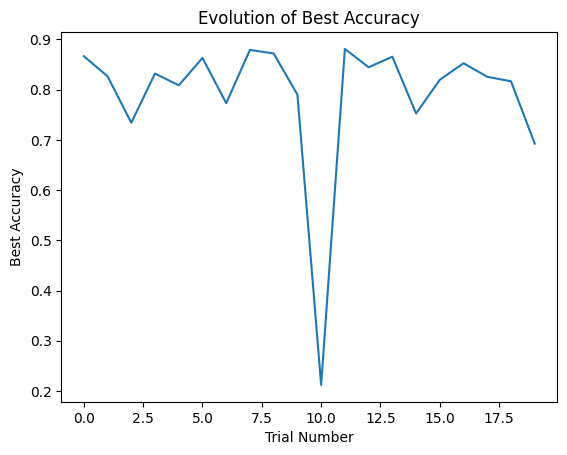

In [19]:
# prompt: Show the evolution of the best accuracy as the study was performed

# Get the history of the study
history = study.trials_dataframe()

# Plot the best value over time
plt.plot(history["number"], history["value"])
plt.xlabel("Trial Number")
plt.ylabel("Best Accuracy")
plt.title("Evolution of Best Accuracy")
plt.show()